<h1><b>📌 Introduction</b></h1>

This project analyzes a real-world dataset of over 100,000 medical appointments in Brazil to predict whether a patient will attend their scheduled appointment. The dataset includes various demographic, behavioral, and health-related attributes. By building predictive models, we aim to help healthcare providers reduce no-show rates and improve appointment scheduling efficiency.

Below is a description of the key features in the dataset:

<ul>
  <li><b>AppointmentID</b>: Unique identifier for each appointment.</li>
  <li><b>Gender</b>: Male or Female. Women typically show higher attendance rates.</li>
  <li><b>ScheduledDay</b>: The date when the appointment was scheduled.</li>
  <li><b>AppointmentDay</b>: The date the patient is supposed to attend.</li>
  <li><b>Age</b>: Patient's age.</li>
  <li><b>Neighbourhood</b>: Geographic location of the clinic.</li>
  <li><b>Scholarship</b>: Indicates if the patient is enrolled in Bolsa Família, a social welfare program. <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia" target="_blank">[Learn more]</a></li>
  <li><b>Hypertension</b>: Indicates if the patient has high blood pressure.</li>
  <li><b>Diabetes</b>: Indicates if the patient is diabetic.</li>
  <li><b>Alcoholism</b>: Indicates if the patient has a history of alcohol abuse.</li>
  <li><b>Handicap</b>: Coded from 0–4 to represent the number of disabilities a patient has.</li>
  <li><b>SMS_received</b>: Indicates whether an SMS reminder was sent to the patient.</li>
  <li><b>No-show</b>: Target variable — whether the patient showed up for the appointment.</li>
</ul>

The goal is to build a machine learning model that can accurately predict no-show appointments based on the above features, enabling smarter, data-driven interventions in the healthcare system.


<h1> <b> Importing required libraries </b> </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import warnings

warnings.filterwarnings("ignore")

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import shap

# Load and Inspect Dataset

In [23]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [24]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


# Basic Checks

In [25]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (110527, 14)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [27]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [28]:
print("\nColumn names:", df.columns.tolist())


Column names: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


In [29]:
print("\nData types:\n", df.dtypes)


Data types:
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [30]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [31]:
print("\nUnique values per column:\n", df.nunique())


Unique values per column:
 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [32]:
print("\nClass Distribution:\n", df['No-show'].value_counts())


Class Distribution:
 No-show
No     88208
Yes    22319
Name: count, dtype: int64


In [33]:
print("\nStatistical Summary:\n", df.describe(include='all'))


Statistical Summary:
            PatientId  AppointmentID  Gender          ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                110527   
unique           NaN            NaN       2                103549   
top              NaN            NaN       F  2016-05-06T07:09:54Z   
freq             NaN            NaN   71840                    24   
mean    1.474963e+14   5.675305e+06     NaN                   NaN   
std     2.560949e+14   7.129575e+04     NaN                   NaN   
min     3.921784e+04   5.030230e+06     NaN                   NaN   
25%     4.172614e+12   5.640286e+06     NaN                   NaN   
50%     3.173184e+13   5.680573e+06     NaN                   NaN   
75%     9.439172e+13   5.725524e+06     NaN                   NaN   
max     9.999816e+14   5.790484e+06     NaN                   NaN   

              AppointmentDay            Age   Neighbourhood    Scholarship  \
count                 110527  110527.000000          110527  110527.00

# Rename Columns

In [34]:
df.rename(columns={
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    'Gender': 'gender',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Age': 'age',
    'Neighbourhood': 'neighbourhood',
    'Scholarship': 'scholarship',
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    'SMS_received': 'sms_received',
    'No-show': 'no_show'
}, inplace=True)

# Convert and Engineer Date Features

In [35]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appointment_date'] = df['appointment_day'].dt.date
df['scheduled_day_of_week'] = df['scheduled_day'].dt.day_name()
df['appointment_day_of_week'] = df['appointment_day'].dt.day_name()

# Filter Invalid Data

In [36]:
df = df[(df['age'] > 0) & (df['age'] < 100)]
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})

# Convert Categorical Columns

In [37]:
df['gender'] = df['gender'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['scheduled_day_of_week'] = df['scheduled_day_of_week'].astype('category')
df['appointment_day_of_week'] = df['appointment_day_of_week'].astype('category')
df['no_show'] = df['no_show'].astype('category')

# Drop Unused Columns

In [38]:
data_clean = df.drop(columns=['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'])

# Encode and Impute

In [39]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

data_clean = df.drop(columns=['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'])
data_clean = pd.get_dummies(data_clean, drop_first=True)
numerical_features = data_clean.select_dtypes(include=['number']).columns
temp_df = data_clean[numerical_features]
imputer = SimpleImputer(strategy='median')
data_clean[numerical_features] = imputer.fit_transform(temp_df)
print("\nColumns in data_clean:", data_clean.columns)


Columns in data_clean: Index(['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'sms_received', 'gender_1', 'neighbourhood_ANDORINHAS',
       'neighbourhood_ANTÔNIO HONÓRIO',
       ...
       'scheduled_day_of_week_Monday', 'scheduled_day_of_week_Saturday',
       'scheduled_day_of_week_Thursday', 'scheduled_day_of_week_Tuesday',
       'scheduled_day_of_week_Wednesday', 'appointment_day_of_week_Monday',
       'appointment_day_of_week_Saturday', 'appointment_day_of_week_Thursday',
       'appointment_day_of_week_Tuesday', 'appointment_day_of_week_Wednesday'],
      dtype='object', length=125)


# Feature Scaling & Split Target

In [40]:
y = df['no_show']
X = df.drop(columns=['no_show', 'patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'])
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional - Handle Class Imbalance with SMOTE

In [41]:
sm = SMOTE(random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

<h1> <b> Exploratory Data Analysis (EDA) </b> </h1>

# Countplot of Show vs No-show

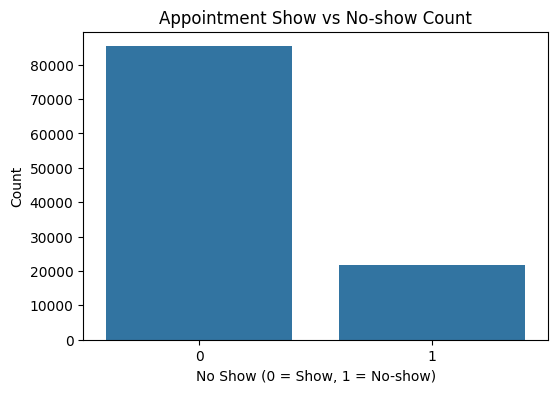

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='no_show', data=df)
plt.title('Appointment Show vs No-show Count')
plt.xlabel('No Show (0 = Show, 1 = No-show)')
plt.ylabel('Count')
plt.show()

# Age distribution

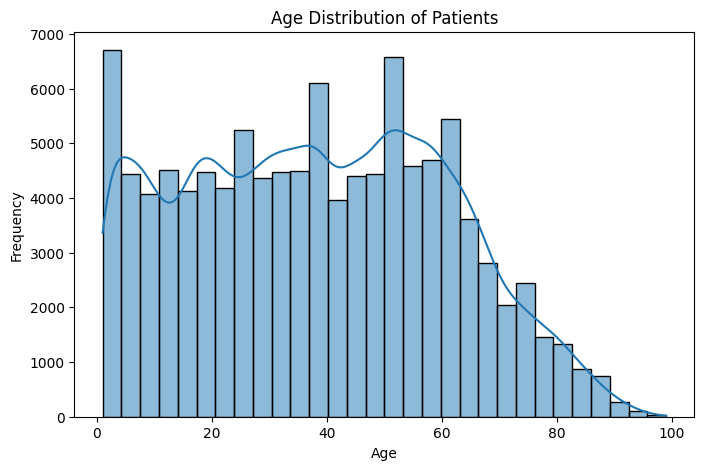

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age vs No-show (Boxplot)

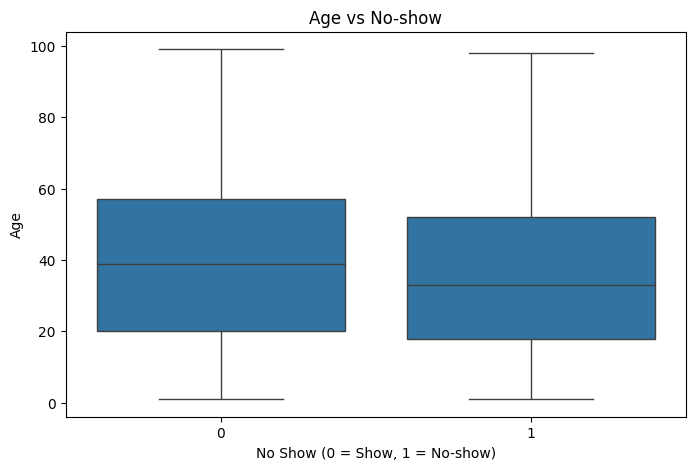

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='no_show', y='age', data=df)
plt.title('Age vs No-show')
plt.xlabel('No Show (0 = Show, 1 = No-show)')
plt.ylabel('Age')
plt.show()

# Gender vs No-show

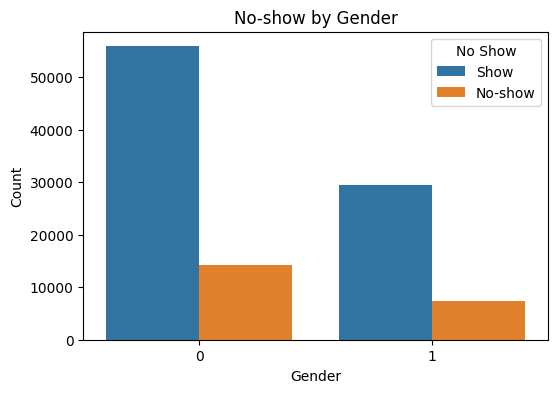

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='no_show', data=df)
plt.title('No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No Show', labels=['Show', 'No-show'])
plt.show()

# Scholarship vs No-show

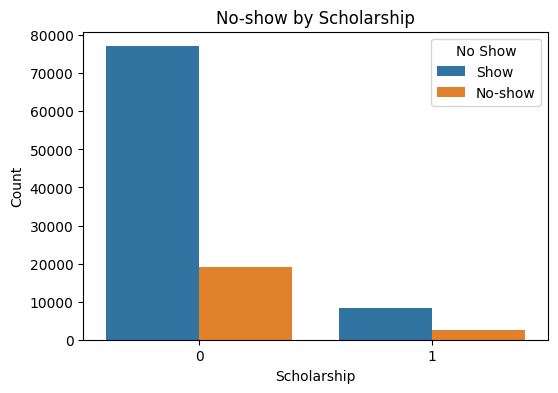

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='scholarship', hue='no_show', data=df)
plt.title('No-show by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.legend(title='No Show', labels=['Show', 'No-show'])
plt.show()

# Countplot: SMS received vs No-show

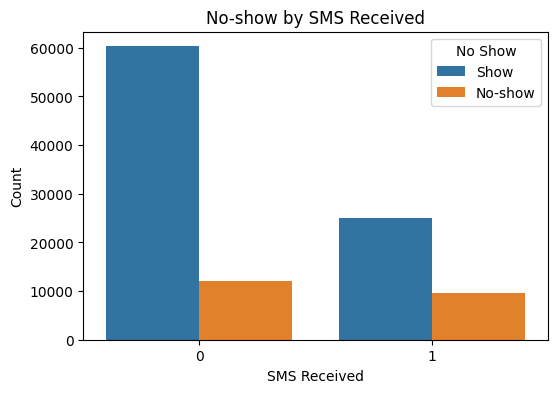

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title('No-show by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No Show', labels=['Show', 'No-show'])
plt.show()

# Correlation Heatmap

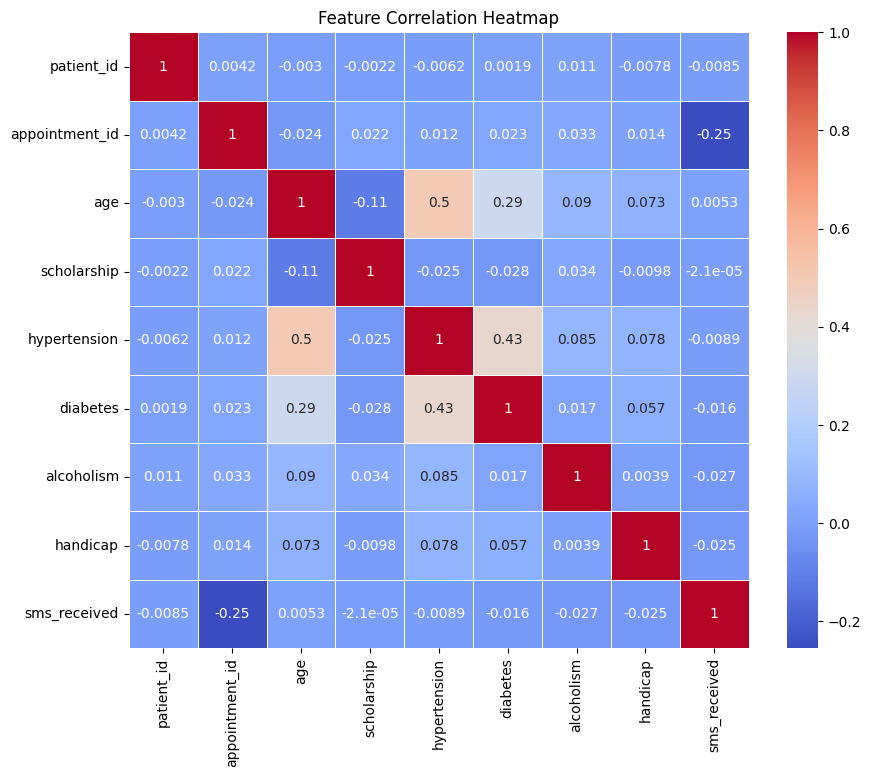

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for key features

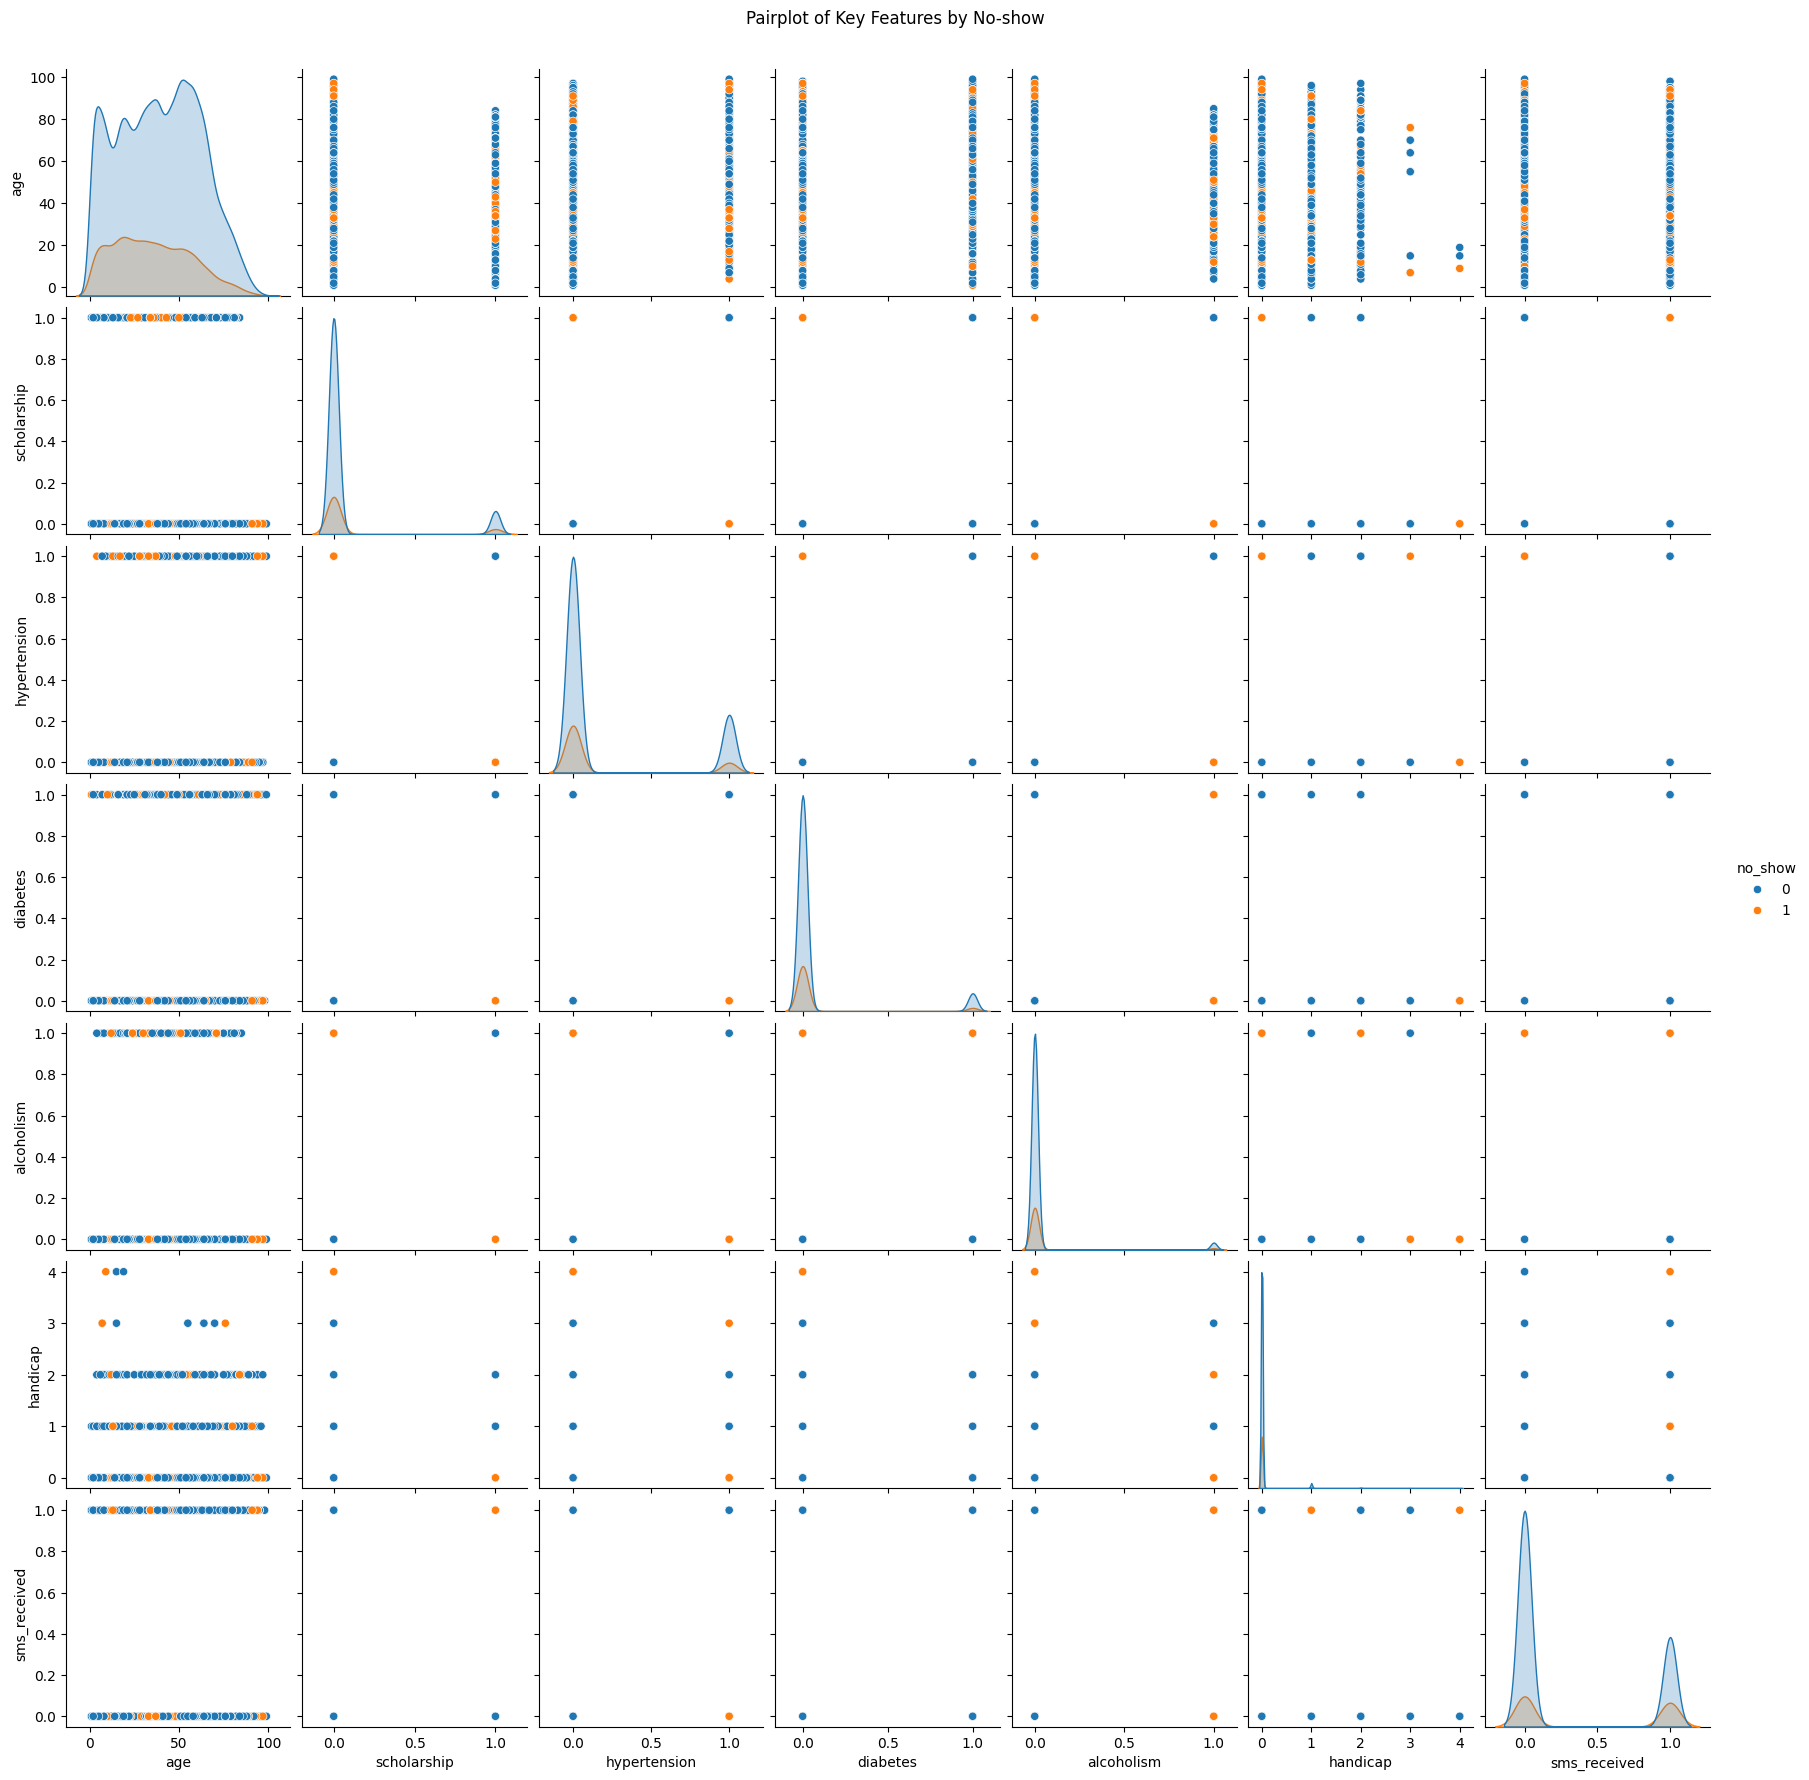

In [49]:
sns.pairplot(df[['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']], hue='no_show')
plt.suptitle('Pairplot of Key Features by No-show', y=1.02)
plt.show()

# Histogram for all numeric features

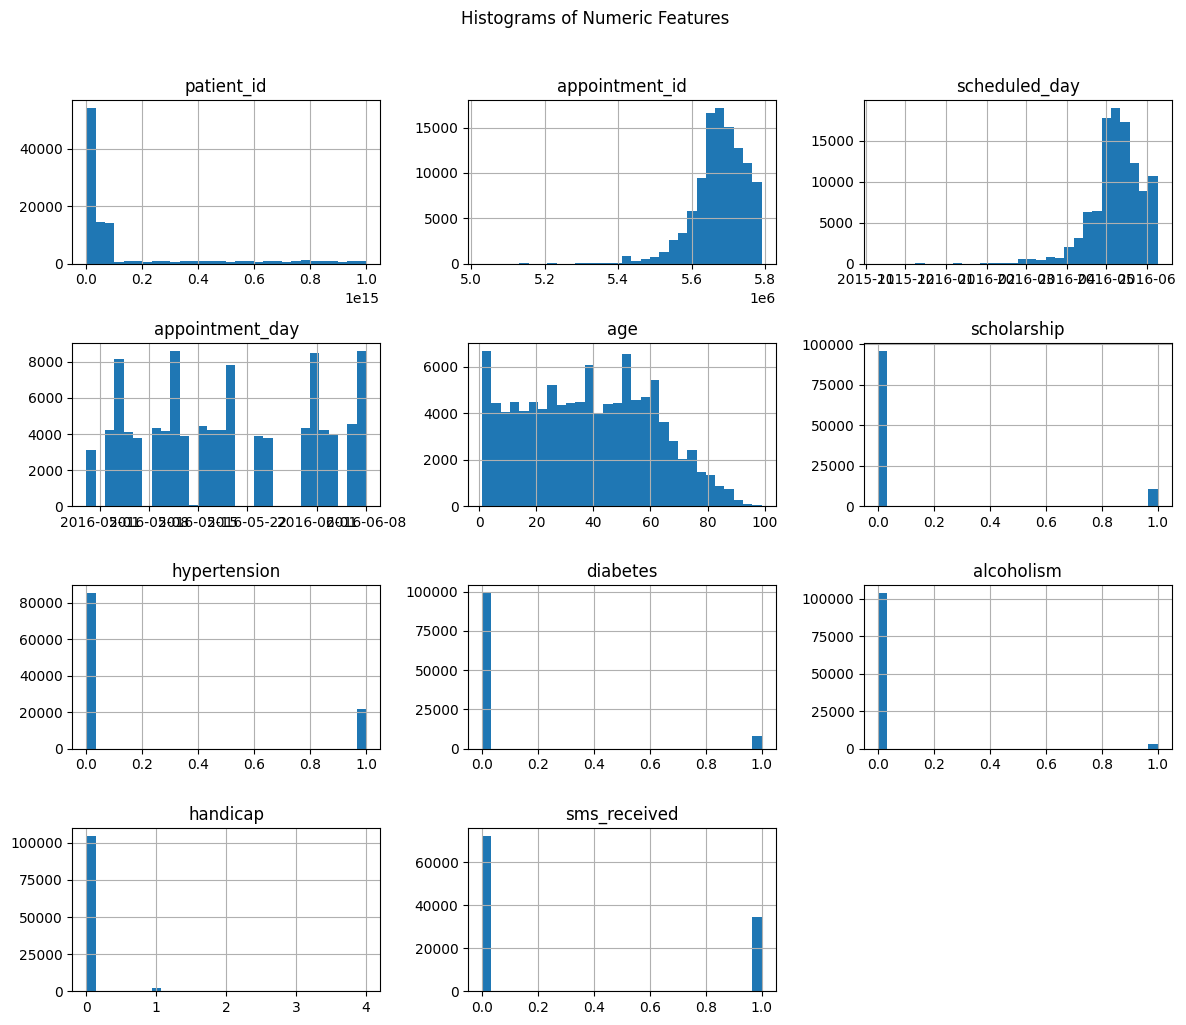

In [50]:
df.hist(figsize=(12,10), bins=30)
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for all numeric features

<Figure size 1400x1000 with 0 Axes>

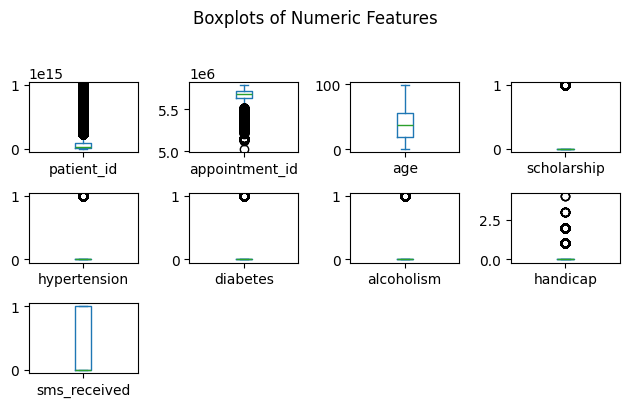

In [51]:
plt.figure(figsize=(14, 10))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

# Filter data for patients who missed appointments

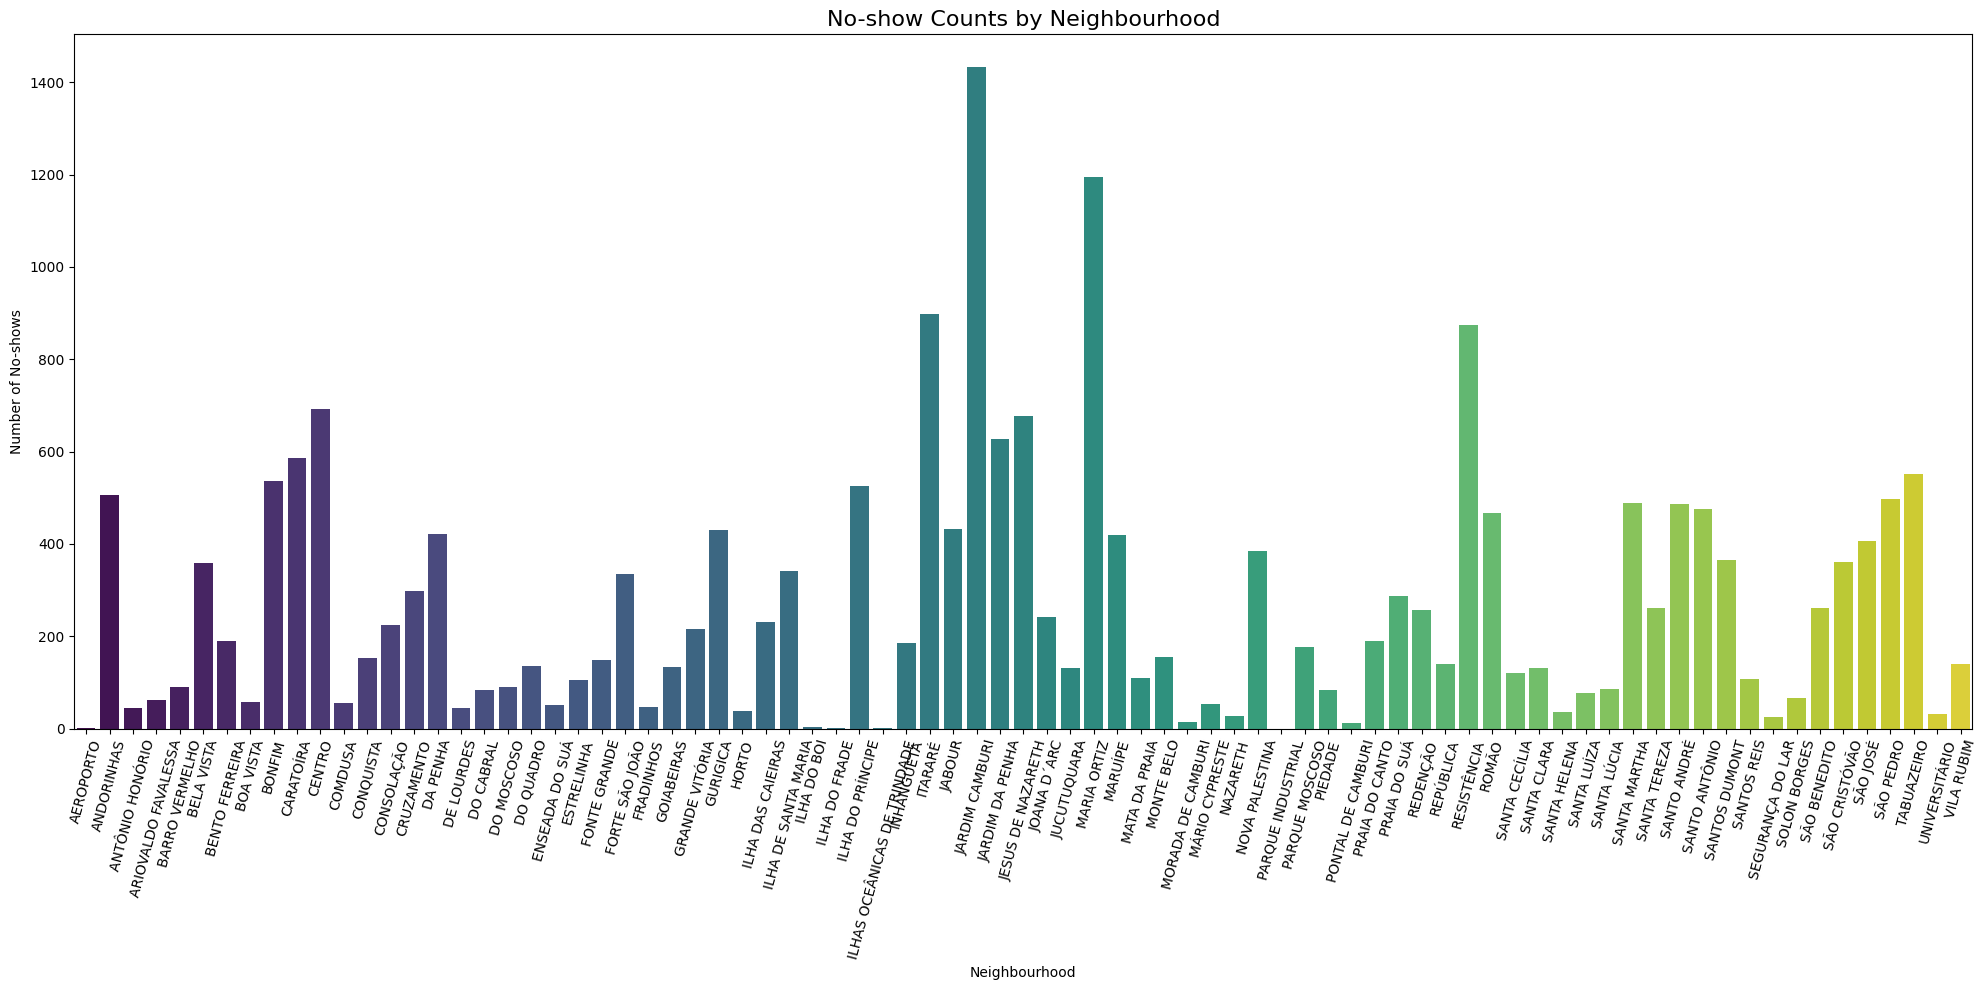

In [52]:
no_show_data = df[df['no_show'] == 1]

# Group by neighbourhood and count no-shows
no_show_by_neighbourhood = (
    no_show_data.groupby('neighbourhood')
    .size()
    .reset_index(name='no_show_count')
    .sort_values(by='no_show_count', ascending=False)
)
plt.figure(figsize=(20, 10))
sns.barplot(
    x='neighbourhood',
    y='no_show_count',
    data=no_show_by_neighbourhood,
    palette='viridis'
)
plt.xticks(rotation=75)
plt.title('No-show Counts by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of No-shows')
plt.tight_layout()
plt.show()

<h1> <b> Evaluate the Performance of Machine Learning Algorithms  </b> </h1>

In [53]:
# Install XGBoost if it's not already installed
try:
    import xgboost
except ImportError:
    !pip install xgboost

# Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Models

In [55]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Hyperparameter Tuning Example (Random Forest)

In [56]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best RF params from GridSearch:", grid.best_params_)

Best RF params from GridSearch: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


 # Evaluation Function

In [57]:
def evaluate_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate All Models

---- Logistic Regression ----
Accuracy: 0.6053048065650645
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     16898
           1       0.60      0.64      0.62     17222

    accuracy                           0.61     34120
   macro avg       0.61      0.60      0.60     34120
weighted avg       0.61      0.61      0.60     34120



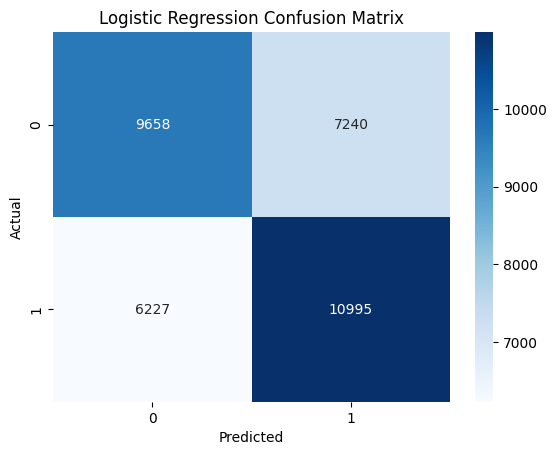

In [58]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)

---- Random Forest ----
Accuracy: 0.8468347010550996
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     16898
           1       0.88      0.81      0.84     17222

    accuracy                           0.85     34120
   macro avg       0.85      0.85      0.85     34120
weighted avg       0.85      0.85      0.85     34120



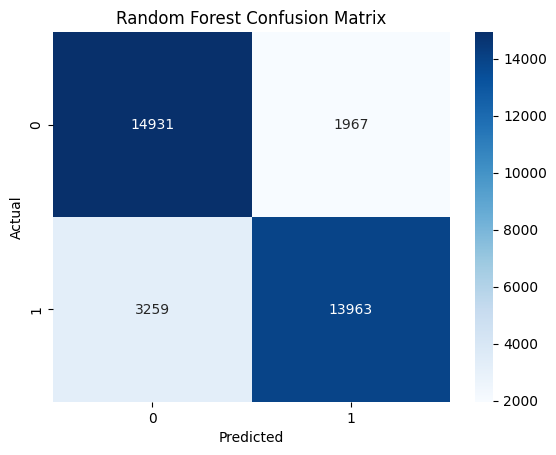

In [59]:
evaluate_model("Random Forest", y_test, y_pred_rf)

---- XGBoost ----
Accuracy: 0.8348182883939038
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     16898
           1       0.93      0.73      0.82     17222

    accuracy                           0.83     34120
   macro avg       0.85      0.84      0.83     34120
weighted avg       0.85      0.83      0.83     34120



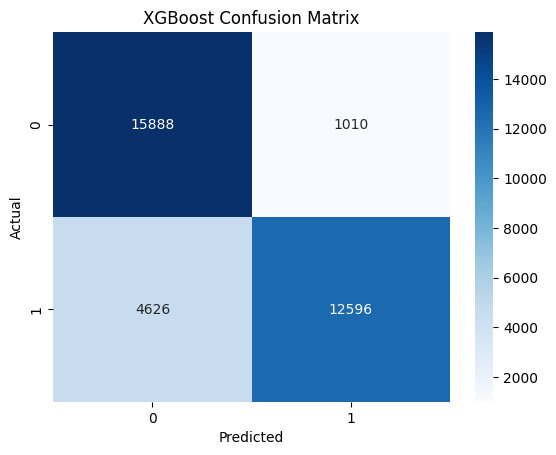

In [60]:
evaluate_model("XGBoost", y_test, y_pred_xgb)

# Best Model by Accuracy

In [61]:
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}
best_model_name = max(accuracies, key=accuracies.get)
print(f" Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.4f}")

 Best Model: Random Forest with Accuracy: 0.8468


# Feature Importance (Extra Trees)

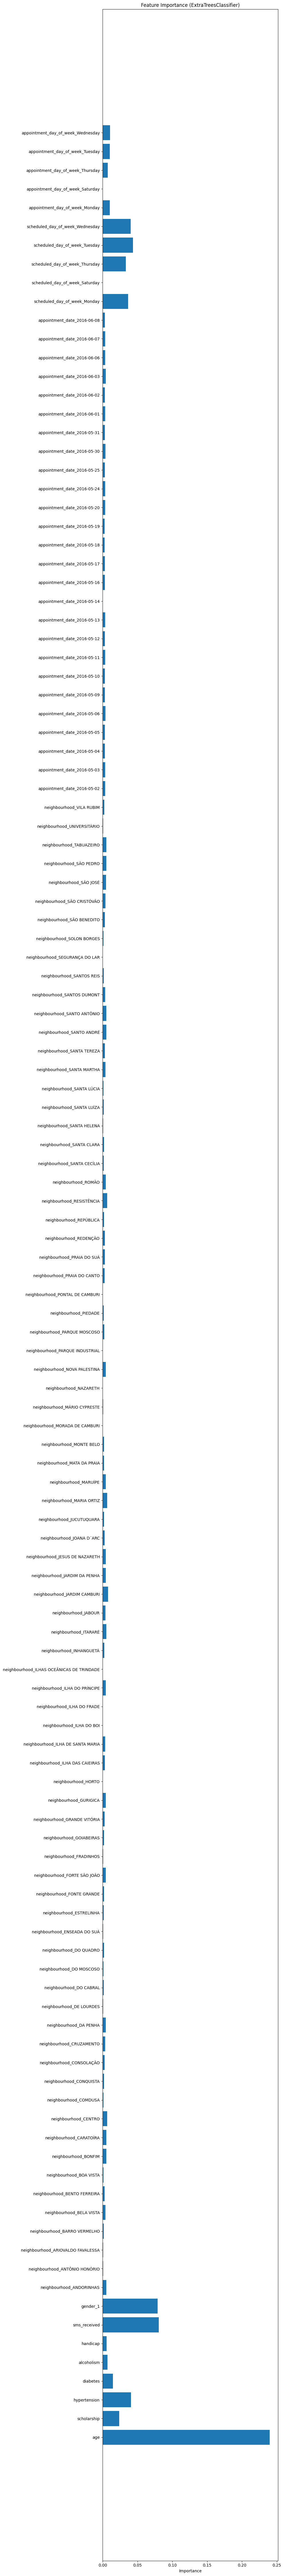

In [62]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_scaled, y)
importances = et_model.feature_importances_


plt.figure(figsize=(10, 90))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.title('Feature Importance (ExtraTreesClassifier)')
plt.tight_layout()
plt.show()

# SHAP Explainability (Optional)

In [ ]:
# SHAP is useful for interpreting model predictions, but it is computationally intensive.
# To avoid memory issues or long runtime on large datasets, we apply it only on a small sample.


#sample_size = 100  # Reduce sample size for performance
#X_sample = pd.DataFrame(X_scaled[:sample_size], columns=X.columns)

#explainer = shap.TreeExplainer(models["Random Forest"])
#shap_values = explainer.shap_values(X_sample)
#shap.summary_plot(shap_values, X_sample, plot_type="bar")

# ROC Curve for Logistic Regression

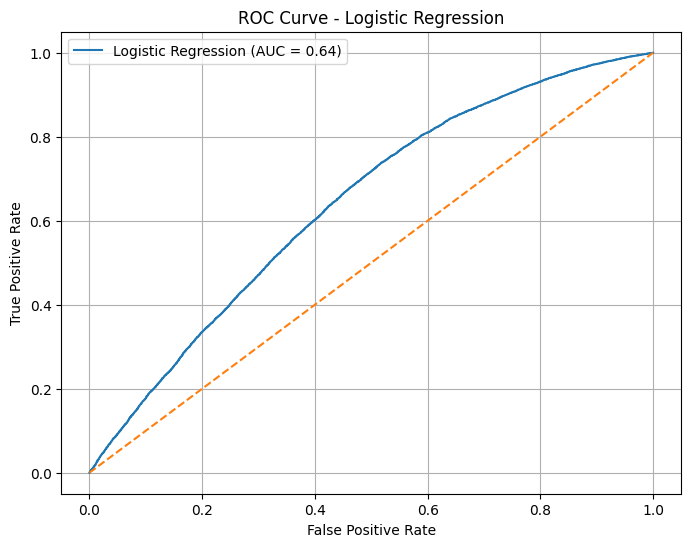

In [63]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Cross-Validation of Classic Models

In [64]:
models = [
    ('LR', LogisticRegression(max_iter=3000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB())
]
print("\n Cross-Validation Accuracy (10-Fold):")
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models:
    # Use X_scaled and y (resampled data) for cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


 Cross-Validation Accuracy (10-Fold):
LR: 0.6068 (+/- 0.0033)
LDA: 0.6067 (+/- 0.0035)
KNN: 0.7666 (+/- 0.0030)
CART: 0.8104 (+/- 0.0023)
NB: 0.5470 (+/- 0.0123)


# Downloading the Cleaned Dataset for Dashboard Deployment

In [65]:
data_clean.to_csv("cleaned_medical_appointments.csv", index=False)

from google.colab import files
files.download("cleaned_medical_appointments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1><b>📌 Conclusion</b></h1>

The objective of this project was to build a predictive model to identify patients likely to miss their medical appointments. The process included comprehensive steps: data cleaning, exploratory data analysis, feature engineering, encoding, scaling, and class imbalance correction using SMOTE.

We trained and compared three main models: Logistic Regression, Random Forest, and XGBoost. To further refine model performance, hyperparameter tuning was applied using GridSearchCV, and SHAP explainability was incorporated to understand feature importance.

<h1>📊 Model Accuracy Comparison</h1>

Model              | Accuracy (%)  
-------------------|---------------
Logistic Regression| 60.5  
Random Forest      | 84.7  
XGBoost Classifier | 83.5  

📍 <b>Key Insights:</b>

- SMS reminders, scholarship status, age, and alcoholism were among the most impactful predictors of no-show behavior.
- Random Forest provided the highest accuracy, followed closely by XGBoost.
- Logistic Regression lagged behind, suggesting that the data relationships are more complex than linear separability.
- SHAP values revealed that age and reminder status strongly influenced model predictions.

<h1><b>🧾 Final Classification Reports</b></h1>

<h2>🔷 XGBoost Classifier</h2>
<p><b>Accuracy:</b> 83.48%</p>
<table border="1" cellpadding="4" cellspacing="0">
<tr><th>Class</th><th>Precision</th><th>Recall</th><th>F1-Score</th><th>Support</th></tr>
<tr><td>0 (Show)</td><td>0.77</td><td>0.94</td><td>0.85</td><td>16,898</td></tr>
<tr><td>1 (No-Show)</td><td>0.93</td><td>0.73</td><td>0.82</td><td>17,222</td></tr>
<tr><td><b>Accuracy</b></td><td colspan="4">0.8348</td></tr>
<tr><td>Macro Avg</td><td>0.85</td><td>0.84</td><td>0.83</td><td>34,120</td></tr>
<tr><td>Weighted Avg</td><td>0.85</td><td>0.83</td><td>0.83</td><td>34,120</td></tr>
</table>

<h2>🟢 Random Forest Classifier</h2>
<p><b>Accuracy:</b> 84.68%</p>
<table border="1" cellpadding="4" cellspacing="0">
<tr><th>Class</th><th>Precision</th><th>Recall</th><th>F1-Score</th><th>Support</th></tr>
<tr><td>0 (Show)</td><td>0.82</td><td>0.88</td><td>0.85</td><td>16,898</td></tr>
<tr><td>1 (No-Show)</td><td>0.88</td><td>0.81</td><td>0.84</td><td>17,222</td></tr>
<tr><td><b>Accuracy</b></td><td colspan="4">0.8468</td></tr>
<tr><td>Macro Avg</td><td>0.85</td><td>0.85</td><td>0.85</td><td>34,120</td></tr>
<tr><td>Weighted Avg</td><td>0.85</td><td>0.85</td><td>0.85</td><td>34,120</td></tr>
</table>

<h2>⚪ Logistic Regression</h2>
<p><b>Accuracy:</b> 60.53%</p>
<table border="1" cellpadding="4" cellspacing="0">
<tr><th>Class</th><th>Precision</th><th>Recall</th><th>F1-Score</th><th>Support</th></tr>
<tr><td>0 (Show)</td><td>0.61</td><td>0.57</td><td>0.59</td><td>16,898</td></tr>
<tr><td>1 (No-Show)</td><td>0.60</td><td>0.64</td><td>0.62</td><td>17,222</td></tr>
<tr><td><b>Accuracy</b></td><td colspan="4">0.6053</td></tr>
<tr><td>Macro Avg</td><td>0.61</td><td>0.60</td><td>0.60</td><td>34,120</td></tr>
<tr><td>Weighted Avg</td><td>0.61</td><td>0.61</td><td>0.60</td><td>34,120</td></tr>
</table>

<h1><b>🚀 Future Work:</b></h1>

- Expand hyperparameter tuning to include more models (e.g., LightGBM, CatBoost).
- Introduce temporal features such as appointment lead time and scheduling delay.
- Integrate this model into a real-time dashboard for clinic use.
- Extend explainability using tools like LIME for instance-level decision support.
